#**Credit Card Approval Prediction**

In today's fast-paced world, financial institutions receive a multitude of credit card applications daily. The process of scrutinizing these applications, considering factors like income levels, loans, and credit reports, can be laborious and prone to errors. It can be automated using Machine learning.

I've developed an **Automatic Credit Card Approval Predictor using advanced machine learning techniques**. The primary goal is to expedite the approval process while maintaining accuracy and precision. The project incorporates a comprehensive pipeline, from exploratory data analysis to model implementation with the **accuracy of 100%**.

This technical journey spans meticulous Exploratory Data Analysis (EDA), diverse machine learning classifiers (Logistic Regression, Random Forest, Decision Tree, XGBoost), and crucial data preprocessing steps (data imputation, normalization, and segregation) and visualization using seaborn and matplotlib.

#**Exploratory Data Analysis (EDA)**

##Libraries

We'll begin by importing the necessary libraries that we'll use for our Credit Card Approval Prediction project.



*   pandas and numpy for data manipulation and numerical operations.
*   matplotlib and seaborn for data visualization.
*   train_test_split for splitting the dataset into training and testing data.
*   MinMaxScaler for data normalization.
*   LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, and XGBClassifier for machine learning models.
*   confusion_matrix, accuracy_score for evaluating classification accuracy metrics
*   ConfusionMatrixDisplay for visually represent accuracy metrics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

##Data Loading

We load our dataset into a pandas DataFrame for analysis.

In [2]:
credit_data = pd.read_csv("/content/crx.data", header = None)

##Data Inspection

To get an initial understanding of the dataset, we'll check the first few rows using **`head()`**:

In [3]:
credit_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


We'll also find the number of rows and columns in the dataset:

In [4]:
credit_data.shape

(690, 16)

From the first few rows of the dataset, it seems like columns '1', '2', '7', '10', '13', and '14' are numerical and the remainings are categorical. However, we need to check the datatype of each columns. Data types of each column can be obtained using dtypes:

In [5]:
credit_data.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

Surprisingly, we found that only columns '2', '7', '10', and '14' are numerical.

##Data Summary

###**Statistical Summary**

Lets check the summary statistics of the numerical columns in the dataset:

In [6]:
credit_data.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


###**Data Information**

To get data information, including non-null entries, data types, and memory usage:

In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


##Data Visualization: Bar Chart

We'll create a bar graph using Seaborn to visualize the distribution of categorical data.

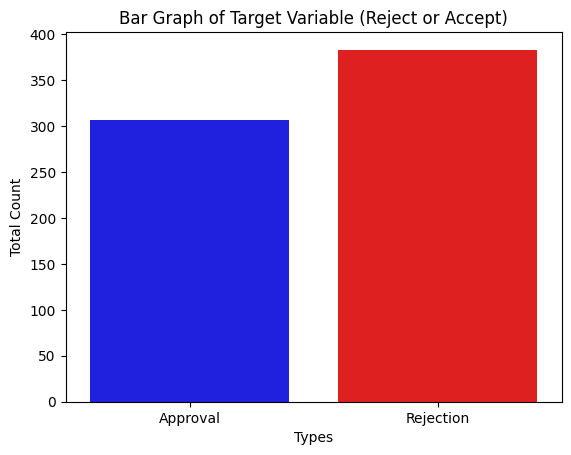

In [8]:
# Create a bar graph using Seaborn
target_column = credit_data.iloc[:, -1]

category_names = ['Approval', 'Rejection']
colors = ["blue", "red"]

sns.countplot(x=target_column, data=credit_data, palette=colors)  # Use countplot for simplicity
plt.xlabel('Types')
plt.ylabel('Total Count')
plt.title('Bar Graph of Target Variable (Reject or Accept)')

# Add names for each bar on the x-axis
plt.xticks(ticks=range(len(category_names)), labels=category_names)

plt.show()

From the chart, we observed that there are more rejections than acceptances in the dataset, but the difference is not significantly high.

##Uniqueness

To explore unique values in each column:

In [9]:
# List unique values for each column
unique_values_per_column = {column: credit_data[column].unique() for column in credit_data.columns}

# Print the unique values for each column
for column, values in unique_values_per_column.items():
    print(f"Column '{column}' has unique values:")
    print(values)


Column '0' has unique values:
['b' 'a' '?']
Column '1' has unique values:
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.2

We found that there are '?' values in some columns. To handle the **missing values**, we replace '?' with 'NaN':

In [10]:
credit_data_nan_replace = credit_data.replace("?", np.NaN)

Counting the total numbers of missing values in each columns

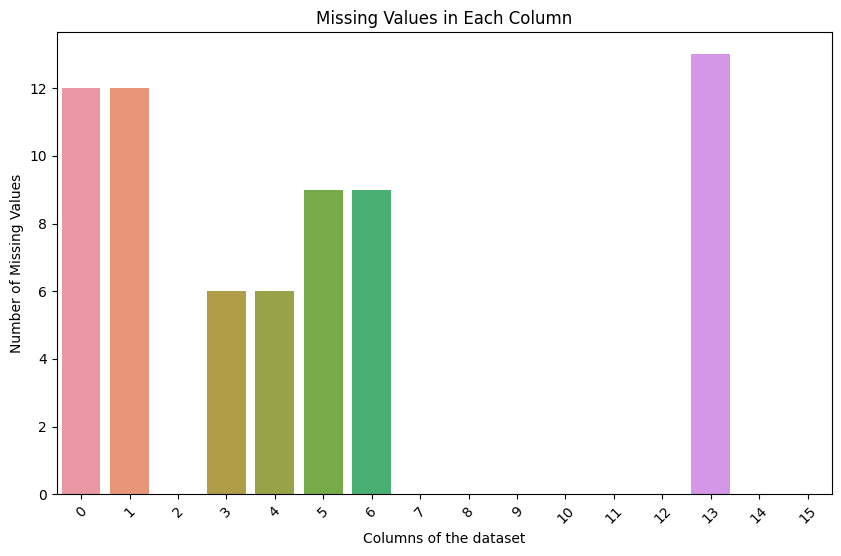

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count missing values in each column
missing_values = credit_data_nan_replace.isnull().sum()

# Plotting the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xlabel('Columns of the dataset')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.xticks(rotation=45)
plt.show()

From the above bar chart, 7 columns have the missing values. Among them, three columns have around 12 missing values, 2 columns have 6 and the remaining two have 9 missing values.

#**Data Preprocessing**

##**Data Split**

We begin by splitting the dataset into training data (75%) and testing data (25%).

In [12]:
credit_train, credit_test = train_test_split(credit_data_nan_replace, test_size= 0.25, random_state=2)

Let's examine the shape of the training and testing datasets:

In [13]:
credit_train.shape, credit_test.shape

((517, 16), (173, 16))

##**Data Imputation**

###Imputing **Missing Value** in Numerical Columns

We address missing values in numerical columns by imputing them with mean values using the fillna() function:

In [14]:
credit_train_imputed = credit_train.fillna(credit_train.mean())
credit_test_imputed = credit_test.fillna(credit_test.mean())

<ipython-input-14-76b132f1134c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_train_imputed = credit_train.fillna(credit_train.mean())
<ipython-input-14-76b132f1134c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_test_imputed = credit_test.fillna(credit_test.mean())


However, a warning is raised regarding the missing argument numeric_only=True. To resolve this, we explicitly include it in the fillna() function:

In [15]:
credit_train_imputed = credit_train.fillna(credit_train.mean(numeric_only=True))
credit_test_imputed = credit_test.fillna(credit_test.mean(numeric_only=True))

###Imputing **Missing Value** in Categorical Columns

Despite handling numerical columns, we still need to address missing values in categorical columns. These columns have the 'object' datatype. We iterate over each column and replace missing values with the most common values (mode) for each column:

In [16]:
for col in credit_train_imputed.columns:
  if credit_train_imputed[col].dtypes == "object":
    credit_train_imputed = credit_train_imputed.fillna(credit_train_imputed[col].value_counts().index[0])
    credit_test_imputed = credit_test_imputed.fillna(credit_test_imputed[col].value_counts().index[0])

##**One-hot Encoding**

To make all values numerical, we employ one-hot encoding to convert categorical values into numerical representation:

In [17]:
train_hot_encoding = pd.get_dummies(credit_train_imputed)
test_hot_encoding = pd.get_dummies(credit_test_imputed)

In [18]:
train_hot_encoding.shape, test_hot_encoding.shape

((517, 486), (173, 265))

After one-hot encoding, it's possible that the test data features may not match those of the training data. In such cases, it's necessary to reindex the test data columns to align them with the training data:

In [19]:
test_hot_encoding = test_hot_encoding.reindex(columns=train_hot_encoding.columns, fill_value=0)
test_hot_encoding.shape

(173, 486)

##**Segregating the feature variables and the target variable**

In the dataset, the last column represents the target variable, while the remaining 15 columns are feature variables. Thus, we segregate the features and the labels:

In [20]:
X_train, y_train = (train_hot_encoding.iloc[:, :-1].values, train_hot_encoding.iloc[:, [-1]].values)
X_test, y_test = (test_hot_encoding.iloc[:, :-1].values, test_hot_encoding.iloc[:, [-1]].values)

Lets check the shape feature variables and target variables in training and test data.

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((517, 485), (173, 485), (517, 1), (173, 1))

We noticed that the shape of the target (label) variables is 2-dimensional. To resolve this, we change them to 1D using the ravel() function:

In [22]:
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

##**Data Normalization**

We implemented four different models using LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, and XGBClassifier. The accuracy for LogisticRegression and RandomForestClassifier improved with data normalization. Other classifiers achieved 100% accuracy even without normalizing the data.

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

#**Building Machine Learning Models**

## **Logistic Regression Model**

###Before normalizing data

In this section, we train a Logistic Regression model using the original (non-normalized) data:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


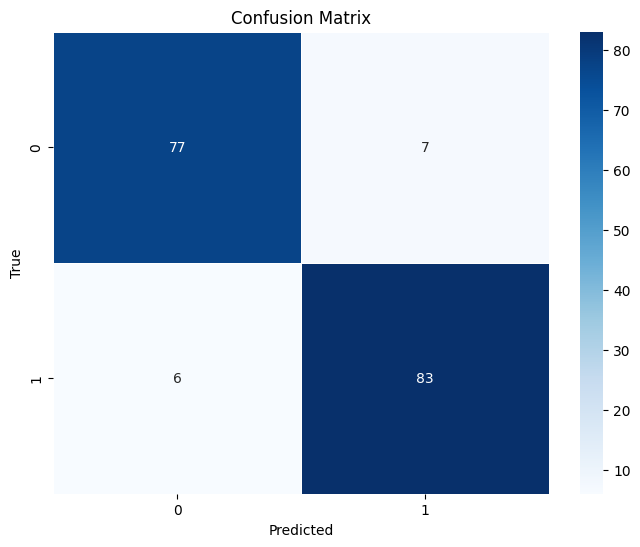

Accuracy: 
 Train Score:  91.87620889748548 % and Test Score:  92.48554913294798 %


In [24]:
# Create an Logistic Regression model
logicalRegressionModel = LogisticRegression()

# Train the model
logicalRegressionModel.fit(X_train, y_train)

# Predictions on training and test sets
train_predict = logicalRegressionModel.predict(X_train)
test_predict = logicalRegressionModel.predict(X_test)

# Calculate accuracy scores
test_accuracy = accuracy_score(y_test, test_predict)
train_accuracy = accuracy_score(y_train, train_predict)

# Generate confusion matrix
confusion_matrix_result = confusion_matrix(y_test, test_predict)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display accuracy scores
print("Accuracy: \n Train Score: ", train_accuracy*100, "% and Test Score: ", test_accuracy*100, "%")

###After the normalizing the data

Next, we retrain the Logistic Regression model after normalizing the data:

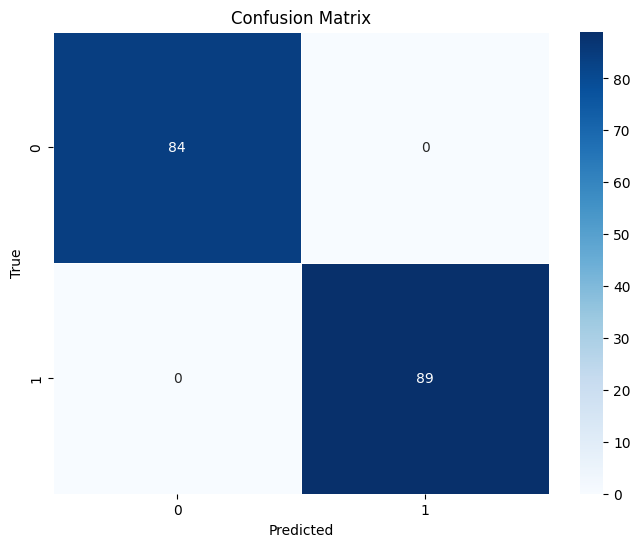

Accuracy: 
 Train Score:  100.0 % and Test Score:  100.0 %


In [25]:
# Create an Logistic Regression model
logicalreg = LogisticRegression()

# Train the model
logicalreg.fit(rescaledX_train, y_train)

# Predictions on training and test sets
train_predict = logicalreg.predict(rescaledX_train)
test_predict = logicalreg.predict(rescaledX_test)

# Calculate accuracy scores
test_accuracy = accuracy_score(y_test, test_predict)
train_accuracy = accuracy_score(y_train, train_predict)

# Generate confusion matrix
confusion_matrix_result = confusion_matrix(y_test, test_predict)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display accuracy scores
print("Accuracy: \n Train Score: ", train_accuracy*100, "% and Test Score: ", test_accuracy*100, "%")

##**Random Forest Clasifier Model**

###Before normalizing data

Now, let's explore the Random Forest Classifier model before normalizing the data:

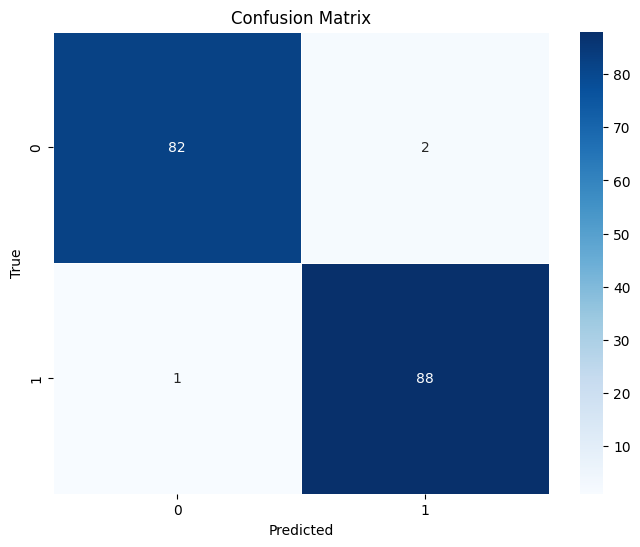

Accuracy: 
 Train Score:  100.0 % and Test Score:  98.26589595375722 %


In [26]:
# Create an Random Forest Classifier model
RFModel = RandomForestClassifier()

# Train the model
RFModel.fit(X_train, y_train)

# Predictions on the training and test sets
train_predict = RFModel.predict(X_train)
test_predict = RFModel.predict(X_test)

# Calculate accuracy scores
test_accuracy = accuracy_score(y_test, test_predict)
train_accuracy = accuracy_score(y_train, train_predict)

# Generate confusion matrix
confusion_matrix_result = confusion_matrix(y_test, test_predict)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display accuracy scores
print("Accuracy: \n Train Score: ", train_accuracy*100, "% and Test Score: ", test_accuracy*100, "%")

###After Normalizing data

Following that, we reevaluate the Random Forest Classifier model after normalizing the data:

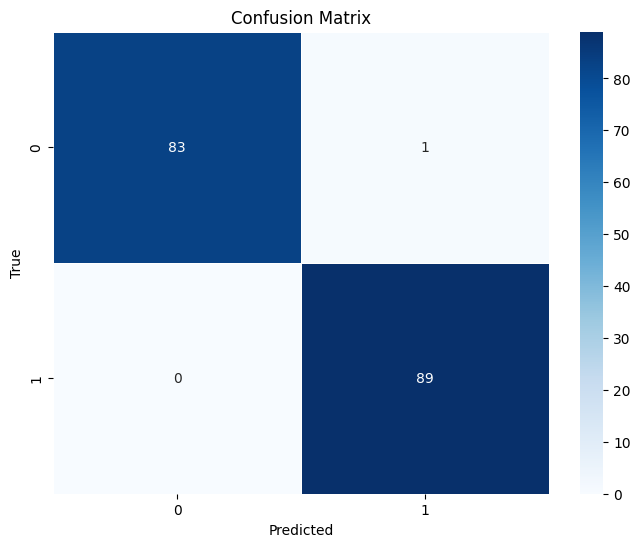

Accuracy: 
 Train Score:  100.0 % and Test Score:  99.42196531791907 %


In [27]:
# Create and train a RandomForestClassifier using the rescaled training data
RFModel = RandomForestClassifier()
RFModel.fit(rescaledX_train, y_train)

# Predictions on training and test sets
train_predict = RFModel.predict(rescaledX_train)
test_predict = RFModel.predict(rescaledX_test)

# Calculate accuracy scores
test_accuracy = accuracy_score(y_test, test_predict)
train_accuracy = accuracy_score(y_train, train_predict)

# Generate confusion matrix
confusion_matrix_result = confusion_matrix(y_test, test_predict)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display accuracy scores
print("Accuracy: \n Train Score: ", train_accuracy*100, "% and Test Score: ", test_accuracy*100, "%")

##**Decision Tree Classifier**

Now, let's move on to the Decision Tree Classifier:

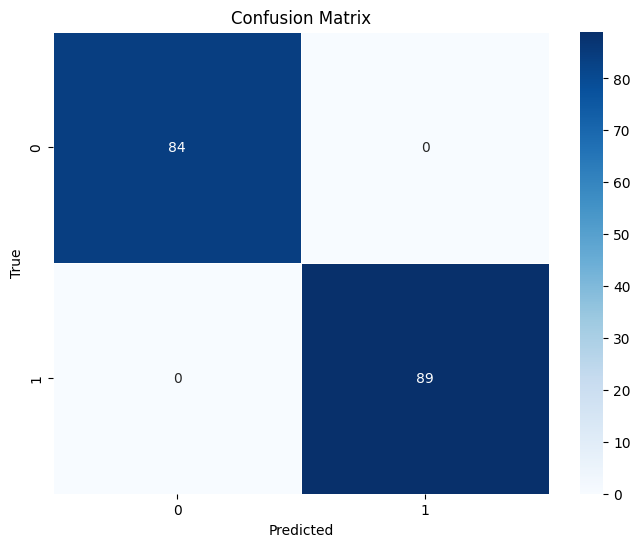

Accuracy: 
 Train Score:  100.0 % and Test Score:  100.0 %


In [28]:
# Create an Decision Tree Classifier model
DTModel = DecisionTreeClassifier()

# Train the model
DTModel.fit(X_train, y_train)

# Predictions on the training and test sets
train_predict = DTModel.predict(X_train)
test_predict = DTModel.predict(X_test)

# Calculate accuracy scores
test_accuracy = accuracy_score(y_test, test_predict)
train_accuracy = accuracy_score(y_train, train_predict)

# Generate confusion matrix
confusion_matrix_result = confusion_matrix(y_test, test_predict)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display accuracy scores
print("Accuracy: \n Train Score: ", train_accuracy*100, "% and Test Score: ", test_accuracy*100, "%")

##**Model using XGBClassifier**

Lastly, we examine the model using XGBClassifier:

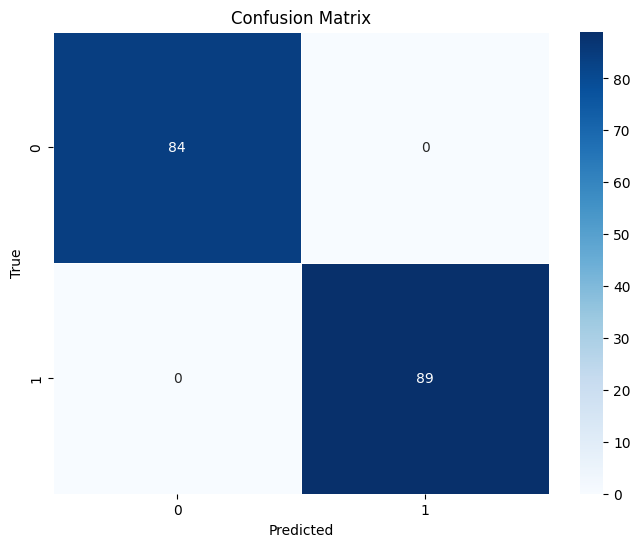

Accuracy: 
 Train Score:  100.0 % and Test Score:  100.0 %


In [29]:
# Create an XGBoost Classifier model
XG_model = XGBClassifier()

# Train the model
XG_model.fit(X_train, y_train)

# Predictions on the training and test sets
train_predict = XG_model.predict(X_train)
test_predict = XG_model.predict(X_test)

# Calculate accuracy scores
test_accuracy = accuracy_score(y_test, test_predict)
train_accuracy = accuracy_score(y_train, train_predict)

# Generate confusion matrix
confusion_matrix_result = confusion_matrix(y_test, test_predict)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display accuracy scores
print("Accuracy: \n Train Score: ", train_accuracy*100, "% and Test Score: ", test_accuracy*100, "%")

#**Conclusion**

By combining meticulous exploratory data analysis, data preprocessing, and robust machine learning models, this project got the 100% accurate credit card approval model with the XGBClassifier, DecisionTreeClassifier and LogisticRegression (with normalized data). The automation not only saves time but also enhances accuracy, paving the way for more efficient decision-making in the financial domain.